# Assignment 4 Ian Feekes

The contents of this notebook function as the submission for Ian Feekes  (ifeekes@sandiego.edu) 916-333-9381. If this submission does not meet the expectations or requirements, please feel free to contact me and I will gratefully and expediently make necessary adjustments.

## Part 1- Feature extraction

### Initial Configuration and Exploration

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


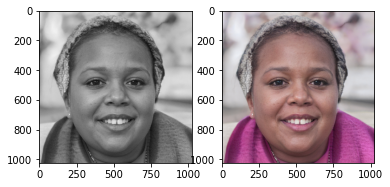

True

In [ ]:
# Read the original image pic1 and create a regular plus a gray version of it. 
# The result should be similar to what you see in instrcutions
f = plt.figure()

imagePath = '/content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG4/Assignment4_pic1.jpg'

pic1_color = cv2.imread(imagePath, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(pic1_color, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.show()

cv2.imwrite('pic1_gray.jpg', img_gray)

### 1.a) SIFT

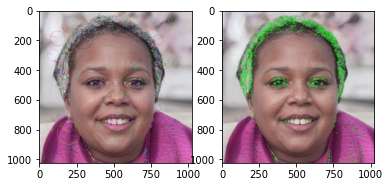

In [ ]:
#a- SIFT
sift = cv2.xfeatures2d.SIFT_create()
# Find detect and compute function and apply it on top of sift
original_keypoints, original_descriptor = sift.detectAndCompute( img_gray, None)
keypoints_without_size = np.copy(img_rgb)
keypoints_with_size = np.copy(img_gray)

# Draw the result here
result1 = cv2.drawKeypoints(img_rgb, original_keypoints, keypoints_with_size,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result2 = cv2.drawKeypoints(img_rgb, original_keypoints,keypoints_without_size, color = (0, 255, 0))

# Plot the result
plt.subplot(1, 2, 1)
plt.imshow(result1)
plt.subplot(1, 2, 2)
plt.imshow(result2)

#### Sift Output Analysis

Scale Invariant Feature Transform (SIFT), extracts keypoints and computes its descriptors to extract distinct invariant features from an image. 
```
original_keypoints, original_descriptor = sift.detectAndCompute( img_gray, None)
```
In the above call performed by the above cell, the keypoints are found for the entire grayscale image. These keypoint structures, which are the first return value of the function, contain meaningful data such as coordinates, meaningful neighborhood size, and an orientation angle.
```
result1 = cv2.drawKeypoints(img_rgb, original_keypoints, keypoints_with_size,
   flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
```
The above call to draw keypoints draws small circles on keypoint locations denoting their coordinates and meaningful neighborhood size.This is shown in the first image, on the left from the cell's output.
```
result2 = cv2.drawKeypoints(img_rgb, original_keypoints,keypoints_without_size, color = (0, 255, 0))
```
The avove call to draw keypoints draws keypoints simply with the output of SIFT keypoint localization - showing the keypoints directly on the image without orientation nor neighborhood. 


### 1.b) FAST

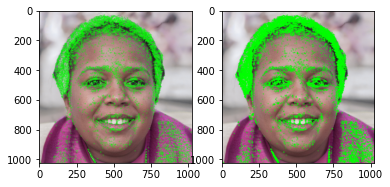

In [ ]:
# b- FAST
fast = cv2.FastFeatureDetector_create() 
# Find detect and compute function and apply it on top of fast
keypoints_with_nonmax = fast.detect( img_gray, None)
image_with_nonmax = np.copy(img_gray)

fast.setNonmaxSuppression(False)
keypoints_with_max = fast.detect( img_gray, None)

result3 = cv2.drawKeypoints(img_rgb, keypoints_with_nonmax, None, color=(0,255,0))
result4 = cv2.drawKeypoints(img_rgb, keypoints_with_max, None, color=(0,255,0))

# Plot the result
plt.subplot(1, 2, 1)
plt.imshow(result3)
plt.subplot(1, 2, 2)
plt.imshow(result4)

#### FAST Output Analysis

Features from Accelerated Segment Test (FAST) was built to accomodate feature detection applications that need to optimize performance, particularly for corner detection.

The algorithm essentially looks at adjacent pixels for thresholding a given pixel if it has a certain number of neighbors with high contrast (whether this is lower or higher pixel values). The algorithm will determine that a pixel is a 'corner' if it has 'n' neighbors which meet contrasting from the given pixel by a certain threshold. 

The difference between the picture on the left and the picture on the right, is that the picture on the right is set without non-maximal suppression, where fast.detect is called after the below line of code:
```
fast.setNonmaxSuppression(False)

```
Non-maximal suppression is a problem with FAST wherein multiple physically-adjacent interest points are captured, reducing the value of given keypoints. This is essentially where if there are two adjacent keypoints that are captured, their cumulative contrast with the adjacent 16 pixels are captured, and the one with smaller cumulative contrast is then discarded. 

This is why the picture on the right without non-maximal suppression, appears to be full of keypoints to the point where you can't make out her eyes nor hair. 

### 1.c) ORB

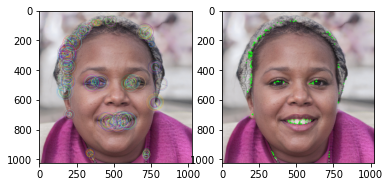

In [ ]:
# c- ORB
orb = cv2.ORB_create()
original_keypoints, original_descriptor = orb.detectAndCompute(img_rgb, None)
query_keypoints, query_descriptor = orb.detectAndCompute(img_gray, None)
keypoints_without_size = np.copy(img_rgb)
keypoints_with_size = np.copy(img_rgb)

result5 = cv2.drawKeypoints(img_rgb, query_keypoints, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result6 = cv2.drawKeypoints(img_rgb, original_keypoints, None, color = (0, 255, 0), flags = 0)

# Plot the result
plt.subplot(1, 2, 1)
plt.imshow(result5)
plt.subplot(1, 2, 2)
plt.imshow(result6)

#### ORB Output Analysis

Oriented FAST and Rotated BRIEF is very popular for its robustness and resistance to noise distortion. It essentially uses FAST (above) to detect keypoints, and then uses BRIEF to find corners and filter the keypoints based on these results. 

Here, the image on the right with the original keypoints showing only their coordinates without their meaningful neighborhood size nor orientations. The result on the left which has the RICH_KEYPOINTS flag enabled, shows their orientation and neighborhood sizes, similar to the FAST output.

### 1.d) Finding the Matching Points

The number of matching keypoints between the original and the query image is 445



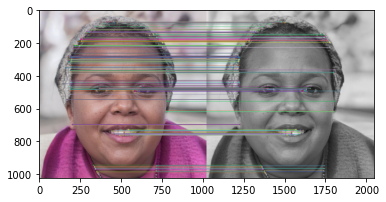

In [ ]:
#d- Finding the matching points
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = brute_force.match(original_descriptor, query_descriptor)
matches = sorted(matches, key = lambda x : x.distance)
result = cv2.drawMatches(img_rgb, original_keypoints, img_gray, query_keypoints, matches, img_gray, flags = 2)
plt.imshow(result)
print("The number of matching keypoints between the original and the query image is {}\n".format(len(matches)))

#### Matching Point Output Analysis

In the above cell, we declare a brute force matcher to detect keypoints between images with the NORM_HAMMING distance being used between points. 
```
matches = brute_force.match(original_descriptor, query_descriptor)
```
In the line of code above, these matches are calculated by the brute force matcher object between keypoints computed in ORB above for the rgb and grayscale images
```
original_keypoints, original_descriptor = orb.detectAndCompute(img_rgb, None)
query_keypoints, query_descriptor = orb.detectAndCompute(img_gray, None)
```
The matches are then sorted and then displayed by the cv2 drawMatches call, wherein lines are drawn between the keypoints in both of the images to indicate the computed matches.

The purpose of matching these points can be used in object classification/identification models when dealing with objects that are scaled and oriented differently. While the above example only shows the keypoints computed between the same image, just with different color values, this very same application can be used for identifying keypoint mappings for finding a desired object in images like below: 
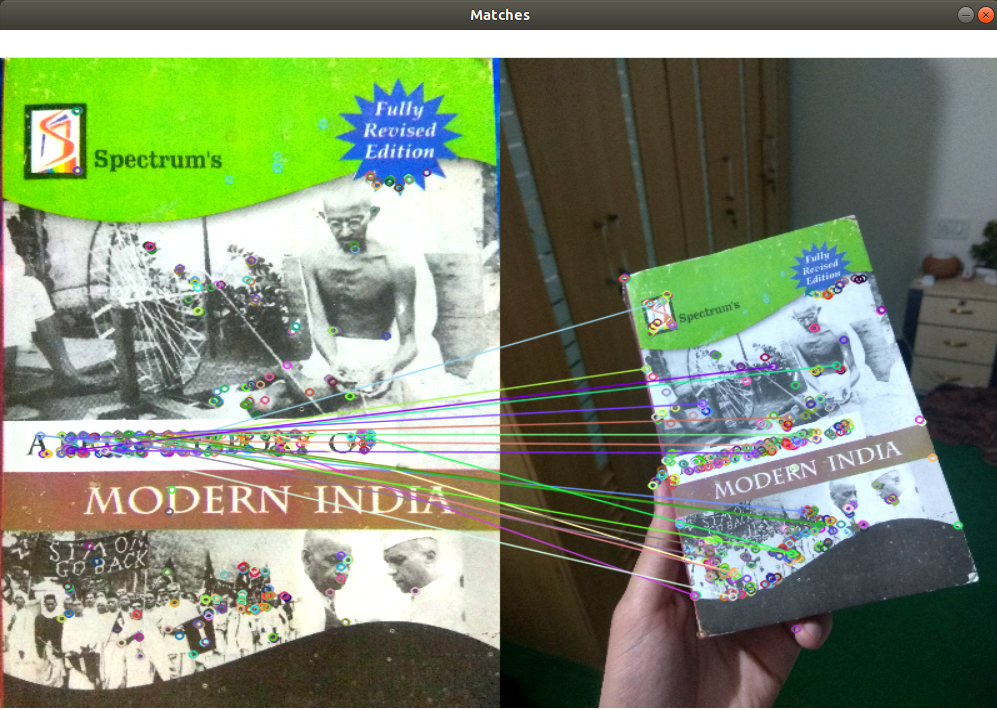

## Part 2- Face recognition 

In [ ]:
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG4/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG4/haarcascade_eye.xml")

img2Path = "/content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG4/Assignment4_pic2.jpg"

img = cv2.imread(img2Path)
gray = cv2.imread(img2Path, cv2.IMREAD_GRAYSCALE)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img1 = cv2.rectangle(img,(x, y),(x + w, y + h),(255,255,0),2)
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = img[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex + ew, ey + eh), (0,255,0),2)

cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#b- Working on webcam
#Function to activate your laptop cam. This function is compete and you don't need to do anything.
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

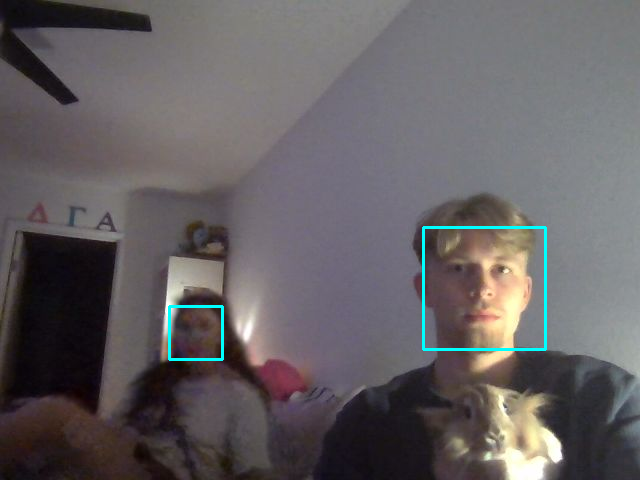

True

In [ ]:
# Here we call the function and open the camera
# Call function and open the camera
image_file = take_photo()

#Show the read image
selfie = cv2.imread(image_file)
selfie_gray = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

faces = face_cascade.detectMultiScale(selfie_gray, 1.3, 5)

#Repeat the above code to detect the face and eyes in your image
# Here you should see your image while the face and eyes are detected
for (x,y,w,h) in faces:
    img1 = cv2.rectangle(selfie,(x, y),(x + w, y + h),(255,255,0),2)
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = img[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex + ew, ey + eh), (0,255,0),2)

cv2_imshow(selfie)
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG4/selfie.jpg', selfie)

## Part 3- Parameter detection 

In [ ]:
lowerBound=np.array([170,100,80])
upperBound=np.array([180,256,256])

#cam= cv2.VideoCapture(0)
kernelOpen=np.ones((5,5))
kernelClose=np.ones((20,20))

font = cv2.FONT_HERSHEY_SIMPLEX

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG4/apple.jpg')

#convert BGR to HSV
imgHSV= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Show this image
cv2_imshow(img)
cv2_imshow(imgHSV)

# create the Mask
mask=cv2.inRange(imgHSV,lowerBound,upperBound)
#morphology
maskOpen=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernelOpen)
maskClose=cv2.morphologyEx(maskOpen,cv2.MORPH_CLOSE,kernelClose)

maskFinal=maskClose
conts,h=cv2.findContours(maskFinal.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img,conts,-1,(255,0,0),1)
for i in range(len(conts)):
    x,y,w,h=cv2.boundingRect(conts[i])
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255), 2)
    cv2.putText(img, str(i+1),(x,y+h),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0))
    
cv2_imshow(maskClose)
cv2_imshow(maskOpen)
cv2_imshow(mask)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print( 'There were ', len(conts),' apples in this picture') #Print number of apples
# There were truly closer to 17/18 apples in the pictures and a lot of these were false positives as well looking at 4 and g, and 6, 8, and 9

There were  15  apples in this picture
